In [1]:
### Importing Required Libraries

import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from keras.preprocessing.text import Tokenizer

from numpy import array, asarray, zeros
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences
from keras.layers.core import Activation, Dropout, Dense
from keras.layers.embeddings import Embedding
from keras.layers import LSTM, Flatten

#### Load the data

In [2]:
dataframe = pd.read_csv(r'C:\Users\sunan\Desktop\Projects\Sentiment analysis(chunks)\Amazon Food Review Analysis\Amazon_FoodReviews.csv')
dataframe.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [3]:
_df = dataframe.drop(['Id','ProductId','UserId','ProfileName','HelpfulnessNumerator', 'HelpfulnessDenominator','Time', 'Summary'], axis=1)
_df.head()

,Score,Text
0,5,I have bought several of the Vitality canned d...
1,1,Product arrived labeled as Jumbo Salted Peanut...
2,4,This is a confection that has been around a fe...
3,2,If you are looking for the secret ingredient i...
4,5,Great taffy at a great price. There was a wid...


In [4]:
_df.isnull().sum()

Score    0
Text     0
dtype: int64

<AxesSubplot:xlabel='Score', ylabel='count'>

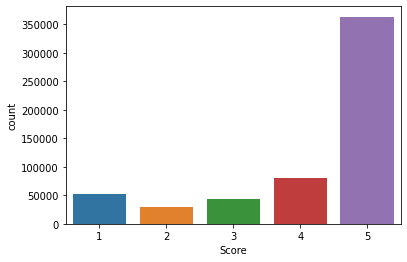

In [5]:
##Checking the distribution 

sns.countplot(x = 'Score', data =_df)

In [6]:
_df['Score'].unique()

array([5, 1, 4, 2, 3], dtype=int64)

In [7]:
df1 = _df.loc[_df["Score"] == 5]
df1

,Score,Text
0,5,I have bought several of the Vitality canned d...
4,5,Great taffy at a great price. There was a wid...
6,5,This saltwater taffy had great flavors and was...
7,5,This taffy is so good. It is very soft and ch...
8,5,Right now I'm mostly just sprouting this so my...
...,...,...
568448,5,My only complaint is that there's so much of i...
568449,5,Great for sesame chicken..this is a good if no...
568451,5,"These stars are small, so you can give 10-15 o..."
568452,5,These are the BEST treats for training and rew...


In [8]:
df2 = _df.loc[_df["Score"] != 5]
df2

,Score,Text
1,1,Product arrived labeled as Jumbo Salted Peanut...
2,4,This is a confection that has been around a fe...
3,2,If you are looking for the secret ingredient i...
5,4,I got a wild hair for taffy and ordered this f...
12,1,My cats have been happily eating Felidae Plati...
...,...,...
568434,2,This soup is mostly broth. Although it has a k...
568435,2,"It is mostly broth, with the advertised 3/4 cu..."
568439,4,We need this for a recipe my wife is intereste...
568446,2,I had ordered some of these a few months back ...


In [9]:
df1.shape

(363122, 2)

In [10]:
df2.shape

(205332, 2)

In [11]:
df1_new = df1.head(181561)
df1_new 

,Score,Text
0,5,I have bought several of the Vitality canned d...
4,5,Great taffy at a great price. There was a wid...
6,5,This saltwater taffy had great flavors and was...
7,5,This taffy is so good. It is very soft and ch...
8,5,Right now I'm mostly just sprouting this so my...
...,...,...
287326,5,You just CANNOT get any better snack than Prin...
287327,5,This is the only tea I drink anymore.<br />The...
287329,5,This soup is a long-standing family favorite (...
287330,5,"These little treats, the size and shape of reg..."


In [12]:
finaldf = pd.concat([df1_new, df2], axis=0)
finaldf

,Score,Text
0,5,I have bought several of the Vitality canned d...
4,5,Great taffy at a great price. There was a wid...
6,5,This saltwater taffy had great flavors and was...
7,5,This taffy is so good. It is very soft and ch...
8,5,Right now I'm mostly just sprouting this so my...
...,...,...
568434,2,This soup is mostly broth. Although it has a k...
568435,2,"It is mostly broth, with the advertised 3/4 cu..."
568439,4,We need this for a recipe my wife is intereste...
568446,2,I had ordered some of these a few months back ...


In [13]:
finaldf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 386893 entries, 0 to 568450
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Score   386893 non-null  int64 
 1   Text    386893 non-null  object
dtypes: int64(1), object(1)
memory usage: 8.9+ MB


In [14]:
finaldf.shape

(386893, 2)

In [15]:
df = shuffle(finaldf)
df

,Score,Text
548437,2,"Nong Shim, Nong Shim... that's all I hear in t..."
32537,5,This juice is very good for a lot of different...
483911,2,I have always loved just about any product tha...
70181,5,I tried this and I like it! I find it to be a ...
433080,3,This tea has a strong and very unusual taste a...
...,...,...
462701,1,My wife and I like strong coffee. Even brewing...
61521,5,Getting your coffee via Amazon is a much cheap...
450824,3,"For the price per pound on this stuff, I would..."
114380,5,Mi-Del Swedish style ginger snaps are deliciou...


<AxesSubplot:xlabel='Score', ylabel='count'>

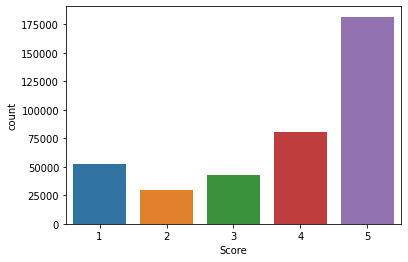

In [16]:
sns.countplot(x = 'Score', data = finaldf)

In [17]:
df.reset_index(drop=True, inplace=True)

In [18]:
df

,Score,Text
0,2,"Nong Shim, Nong Shim... that's all I hear in t..."
1,5,This juice is very good for a lot of different...
2,2,I have always loved just about any product tha...
3,5,I tried this and I like it! I find it to be a ...
4,3,This tea has a strong and very unusual taste a...
...,...,...
386888,1,My wife and I like strong coffee. Even brewing...
386889,5,Getting your coffee via Amazon is a much cheap...
386890,3,"For the price per pound on this stuff, I would..."
386891,5,Mi-Del Swedish style ginger snaps are deliciou...


In [21]:
import csv    ## creating new csv ## dropped unnecessary columns
df.to_csv('Foodreviews.csv',index = False)

In [22]:
df= pd.read_csv(r'C:\Users\sunan\Desktop\Projects\Sentiment analysis(chunks)\Sentiment_V3\Foodreviews.csv')  
df.head(20)

,Score,Text
0,1,"We have now gone through 4 formulas, and here ..."
1,5,My miniature Schnauzer absolutely loves these ...
2,5,I use it to help jump start my weight loss reg...
3,5,Used to use clumping cheap litter for our 4 mo...
4,5,These supposedly have some of the highest leve...
5,1,There is nothing special or unique about this ...
6,5,Caribou is a nice coffee blend - full of flavo...
7,4,This is the only sweet and sour sauce out of t...
8,5,This is a wonderful kit. They ferment out quic...
9,5,This is my first amazon review - I had to writ...


In [23]:
df.shape

(386893, 2)

### Divide the data into chunks

In [24]:
chunk_size = 50000
batch_no = 1 

In [25]:
for chunk in pd.read_csv(r'C:\Users\sunan\Desktop\Projects\Sentiment analysis(chunks)\Sentiment_V3\Foodreviews.csv', chunksize = chunk_size):
    chunk.to_csv('Foodreviews_Amazon' + str(batch_no) + '.csv', index=False)
    batch_no +=1

#### Divided into 8 different datasets

### Dataset 1

In [19]:
df1= pd.read_csv(r'C:\Users\sunan\Desktop\Projects\Sentiment analysis(chunks)\Sentiment_V3\Foodreviews_Amazon1.csv')  
df1.head()

,Score,Text
0,1,"We have now gone through 4 formulas, and here ..."
1,5,My miniature Schnauzer absolutely loves these ...
2,5,I use it to help jump start my weight loss reg...
3,5,Used to use clumping cheap litter for our 4 mo...
4,5,These supposedly have some of the highest leve...


<AxesSubplot:xlabel='Score', ylabel='count'>

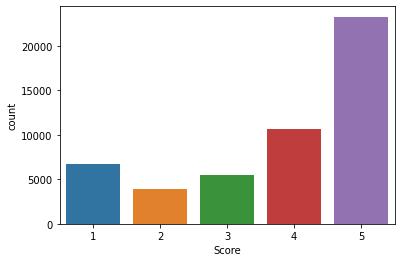

In [20]:
sns.countplot(x = 'Score', data = df1)

In [21]:
#checking random data from the dataframe

import random
randomlist = [random.randint(1,len(df1.Text)) for i in range(10)] 
df1.loc[randomlist,:].head(10)

,Score,Text
48423,5,My cats love these treats and they're good for...
28857,1,Does not taste good. Only meant for smoothies...
18494,4,I am a mixer at heart. I love my oatmeal every...
8376,5,I have a Bengal cat and was looking for a good...
33147,3,I went out on a limb trying Blue Diamond Almon...
21722,4,"This tea is very tasty, so much better than bo..."
44863,2,While Earth's Best produces great organic prod...
33351,5,Once you use pure Madagascar bourbon vanilla i...
3735,5,"Before trying pill pockets, we used to shove a..."
3722,3,"A little bit of hulls can be found in product,..."


In [24]:
#Food rating Scores

ratings = {1:"Highly Negative", 2:"Negative", 3:"Neutral", 4:"Positive ", 5:"Highly Positive"}
def label_decoder(Score):
    return ratings[Score]
df1.Score = df1.Score.apply(lambda x: label_decoder(x))
df1.head()

,Score,Text
0,Negative,"Nong Shim, Nong Shim... that's all I hear in t..."
1,Highly Poritive,This juice is very good for a lot of different...
2,Negative,I have always loved just about any product tha...
3,Highly Poritive,I tried this and I like it! I find it to be a ...
4,Neutral,This tea has a strong and very unusual taste a...


In [25]:
#preprocessing data


def data_cleaning(text):
    text = str(text).lower()  # convert to lowercase
    text = re.sub(pattern=r'\s+[a-zA-Z]\s+',repl='',string = text)   # remove single characters
    text = re.sub(r'https?://\S+|www\.\S+',repl='',string = text)   # Remove URls, whitespace characters 
    text = re.sub(r'[^a-z\s]',' ',string = text)# Removes all the special characters, digits from 0-9 and Capital Letters
    text = re.sub(r'\s+', ' ', string = text)  # Substituting multiple spaces with single space
    ps = PorterStemmer()
    text = [ps.stem(word) for word in text.split() if not word in set(stopwords.words('english'))]
    text = ' '.join(text)
    return text

In [26]:
df1.Text = df1.Text.apply(lambda x: data_cleaning(x))

In [29]:
df1

,Score,Text
0,1,gone formula conclus br br similac non organ u...
1,5,miniatur schnauzer absolut love talk treat che...
2,5,use help jump start weight loss regim sometim ...
3,5,use use clump cheap litter month old kitti sup...
4,5,supposedli highest level antioxid food whyboug...
...,...,...
49995,5,year old cat never like cat treat triedvarieti...
49996,2,recommend asseri side dish fornic dinner remin...
49997,5,tri first one packag crack came frozen ate cra...
49998,5,daughter love happi find organ snack doesnt su...


In [30]:
max_no_words = 5000
max_sequence_length = 30

In [31]:
#data Splitting: train, test

train_data, test_data = train_test_split(df1, test_size=0.20,random_state=7)
print("Train Data size:", len(train_data))
print("Test Data size", len(test_data))

Train Data size: 40000
Test Data size 10000


In [32]:
train_data.head(10)

,Score,Text
25164,5,emeril big easi bold along timothi french roas...
37366,5,leftreview product elsewher well purchas regul...
24912,5,href hanov cheddar chees pretzel piec ounc pac...
7345,5,look far wide forgluten free crust hand best e...
28620,3,first onebit tough leather andhad rip teeth ma...
4267,5,pop corn good everi kernel pop hadveri good ta...
40891,4,great product babi like product fact contain l...
26038,5,enjoy product year troubl find local store gla...
26159,4,good valu money tast fine strength fine cup wo...
24458,5,love melitta coffe pod makesperfect cup coffe ...


In [33]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data.Text)

word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary Size :", vocab_size)

Vocabulary Size : 64329


In [34]:
x_train = pad_sequences(tokenizer.texts_to_sequences(train_data.Text),
                        maxlen = max_sequence_length)
x_test = pad_sequences(tokenizer.texts_to_sequences(test_data.Text),
                       maxlen = max_sequence_length)

print("Training X Shape:",x_train.shape)
print("Testing X Shape:",x_test.shape)

Training X Shape: (40000, 30)
Testing X Shape: (10000, 30)


In [35]:
train_data.Score.unique().tolist()

[5, 3, 4, 1, 2]

In [36]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(train_data.Score.to_list())

LabelEncoder()

In [37]:
y_train = encoder.transform(train_data.Score.to_list())
y_test = encoder.transform(test_data.Score.to_list())

In [38]:
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

y_train shape: (40000, 1)
y_test shape: (10000, 1)


In [39]:
## Embedding Layer

In [40]:
glv_emb = open(r'C:\Users\sunan\Desktop\Projects\Sentiment analysis(chunks)\Amazon Food Review Analysis\Glove Embedding\glove.6B.100d.txt', encoding='utf8')

In [48]:
LR = 1e-3
EMBEDDING_DIM = 100
BATCH_SIZE = 128
EPOCHS = 10

In [42]:
embeddings_index = {}

for line in glv_emb:
    values = line.split()
    word = value = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
        
glv_emb.close()

print('Found %s word vectors.' %len(embeddings_index))

Found 400000 word vectors.


In [43]:
embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [44]:
import tensorflow as tf
embedding_layer = tf.keras.layers.Embedding(vocab_size,
                                          EMBEDDING_DIM,
                                          weights=[embedding_matrix],
                                          input_length=max_sequence_length,
                                          trainable=False)

In [45]:
model = Sequential()
model.add(embedding_layer)
model.add(LSTM(128))
model.add(Flatten())
model.add(Dense(128, activation= 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [46]:
model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [47]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 30, 100)           6432900   
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 flatten (Flatten)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 128)               16512     
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 6,566,789
Trainable params: 133,889
Non-trainable params: 6,432,900
_________________________________________________________________


In [49]:
history = model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(x_test, y_test), verbose=1)

Epoch 1/10
313/313 [==============================] - 36s 109ms/step - loss: -1332.9939 - accuracy: 0.0766 - val_loss: -3955.4968 - val_accuracy: 0.0806
Epoch 2/10
313/313 [==============================] - 34s 109ms/step - loss: -9127.6289 - accuracy: 0.0767 - val_loss: -15517.6885 - val_accuracy: 0.0806
Epoch 3/10
313/313 [==============================] - 34s 108ms/step - loss: -24287.6270 - accuracy: 0.0767 - val_loss: -34072.4688 - val_accuracy: 0.0806
Epoch 4/10
313/313 [==============================] - 34s 109ms/step - loss: -46099.1602 - accuracy: 0.0767 - val_loss: -58938.4258 - val_accuracy: 0.0806
Epoch 5/10
313/313 [==============================] - 34s 110ms/step - loss: -73905.5469 - accuracy: 0.0767 - val_loss: -89446.2656 - val_accuracy: 0.0806
Epoch 6/10
313/313 [==============================] - 35s 113ms/step - loss: -107169.2500 - accuracy: 0.0767 - val_loss: -125190.0703 - val_accuracy: 0.0806
Epoch 7/10
313/313 [==============================] - 37s 117ms/step - 

## Dataset 2

In [50]:
df2= pd.read_csv(r'C:\Users\sunan\Desktop\Projects\Sentiment analysis(chunks)\Sentiment_V3\Foodreviews_Amazon2.csv')  
df2.head()

,Score,Text
0,5,I agree that this product may cost more from A...
1,5,Great dog food shipped to my door monthly. My ...
2,2,I purchased this at a great price from Amazon....
3,5,My dogs love this stuff. You feed less food t...
4,5,I'll admit outright that I don't normally like...


<AxesSubplot:xlabel='Score', ylabel='count'>

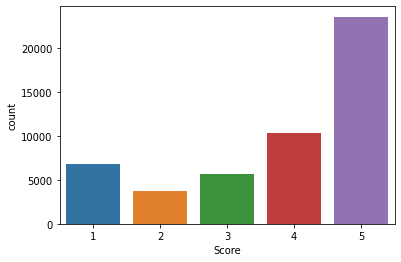

In [51]:
sns.countplot(x = 'Score', data = df2)

In [52]:
#Food rating Scores

ratings = {1:"Highly Negative", 2:"Negative", 3:"Neutral", 4:"Positive ", 5:"Highly Positive"}
def label_decoder(Score):
    return ratings[Score]
df2.Score = df2.Score.apply(lambda x: label_decoder(x))
df2.head()

,Score,Text
0,Highly Positive,I agree that this product may cost more from A...
1,Highly Positive,Great dog food shipped to my door monthly. My ...
2,Negative,I purchased this at a great price from Amazon....
3,Highly Positive,My dogs love this stuff. You feed less food t...
4,Highly Positive,I'll admit outright that I don't normally like...


In [53]:
#preprocessing data


def data_cleaning(text):
    text = str(text).lower()  # convert to lowercase
    text = re.sub(pattern=r'\s+[a-zA-Z]\s+',repl='',string = text)   # remove single characters
    text = re.sub(r'https?://\S+|www\.\S+',repl='',string = text)   # Remove URls, whitespace characters 
    text = re.sub(r'[^a-z\s]',' ',string = text)# Removes all the special characters, digits from 0-9 and Capital Letters
    text = re.sub(r'\s+', ' ', string = text)  # Substituting multiple spaces with single space
    ps = PorterStemmer()
    text = [ps.stem(word) for word in text.split() if not word in set(stopwords.words('english'))]
    text = ' '.join(text)
    return text

In [54]:
df2.Text = df2.Text.apply(lambda x: data_cleaning(x))

In [55]:
df2

,Score,Text
0,Highly Positive,agre product may cost amazon notdeal breaker r...
1,Highly Positive,great dog food ship door monthli boxer enjoy f...
2,Negative,purchas atgreat price amazon pleas flavor budd...
3,Highly Positive,dog love stuff feed less food thu pick less po...
4,Highly Positive,admit outright thatdon normal like coffe mbig ...
...,...,...
49995,Highly Positive,like flavor ginger candi good help nausea tast...
49996,Positive,tast almost bile like nearli intoler howev giv...
49997,Neutral,cytosport energi drink ishelp sport supplement...
49998,Highly Negative,receiv shipment found seed onehad live whole f...


In [56]:
#data Splitting: train, test

train_data, test_data = train_test_split(df2, test_size=0.20,random_state=7)
print("Train Data size:", len(train_data))
print("Test Data size", len(test_data))

train_data.head(10)

tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data.Text)

word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary Size :", vocab_size)



x_train = pad_sequences(tokenizer.texts_to_sequences(train_data.Text),
                        maxlen = max_sequence_length)
x_test = pad_sequences(tokenizer.texts_to_sequences(test_data.Text),
                       maxlen = max_sequence_length)

print("Training X Shape:",x_train.shape)
print("Testing X Shape:",x_test.shape)


train_data.Score.unique().tolist()

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(train_data.Score.to_list())


y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


## Embedding Layer
glv_emb = open(r'C:\Users\sunan\Desktop\Projects\Sentiment analysis(chunks)\Amazon Food Review Analysis\Glove Embedding\glove.6B.100d.txt', encoding='utf8')

LR = 1e-3
EMBEDDING_DIM = 100
BATCH_SIZE = 128
EPOCHS = 10


embeddings_index = {}

for line in glv_emb:
    values = line.split()
    word = value = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
        
glv_emb.close()

print('Found %s word vectors.' %len(embeddings_index))

embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

import tensorflow as tf
embedding_layer = tf.keras.layers.Embedding(vocab_size,
                                          EMBEDDING_DIM,
                                          weights=[embedding_matrix],
                                          input_length=max_sequence_length,
                                          trainable=False)

model = Sequential()
model.add(embedding_layer)
model.add(LSTM(128))
model.add(Flatten())
model.add(Dense(128, activation= 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

model.summary()

history = model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(x_test, y_test), verbose=1)

Train Data size: 40000
Test Data size 10000
Vocabulary Size : 64329
Training X Shape: (40000, 30)
Testing X Shape: (10000, 30)
y_train shape: (40000, 1)
y_test shape: (10000, 1)
Found 400000 word vectors.
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 30, 100)           6432900   
                                                                 
 lstm_1 (LSTM)               (None, 128)               117248    
                                                                 
 flatten_1 (Flatten)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                               

## Dataset 3

In [58]:
df3= pd.read_csv(r'C:\Users\sunan\Desktop\Projects\Sentiment analysis(chunks)\Sentiment_V3\Foodreviews_Amazon3.csv')  
df3.head()

,Score,Text
0,5,These raisins are moist and have a lot of flav...
1,1,Like the product not the price at Amazon. Just...
2,2,There was nothing in the package that indicate...
3,2,I seldom enjoy Kona coffee because it is so ex...
4,4,The machine is wonderful except that I have to...


<AxesSubplot:xlabel='Score', ylabel='count'>

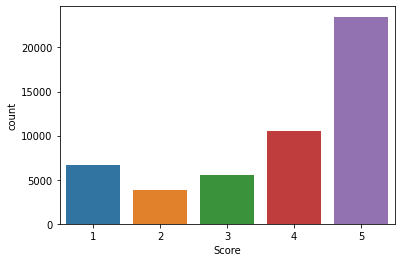

In [59]:
sns.countplot(x = 'Score', data = df3)

In [61]:
#Food rating Scores

ratings = {1:"Highly Negative", 2:"Negative", 3:"Neutral", 4:"Positive ", 5:"Highly Positive"}
def label_decoder(Score):
    return ratings[Score]
df3.Score = df3.Score.apply(lambda x: label_decoder(x))
df3.head()

,Score,Text
0,Highly Positive,These raisins are moist and have a lot of flav...
1,Highly Negative,Like the product not the price at Amazon. Just...
2,Negative,There was nothing in the package that indicate...
3,Negative,I seldom enjoy Kona coffee because it is so ex...
4,Positive,The machine is wonderful except that I have to...


In [62]:
#preprocessing data


def data_cleaning(text):
    text = str(text).lower()  # convert to lowercase
    text = re.sub(pattern=r'\s+[a-zA-Z]\s+',repl='',string = text)   # remove single characters
    text = re.sub(r'https?://\S+|www\.\S+',repl='',string = text)   # Remove URls, whitespace characters 
    text = re.sub(r'[^a-z\s]',' ',string = text)# Removes all the special characters, digits from 0-9 and Capital Letters
    text = re.sub(r'\s+', ' ', string = text)  # Substituting multiple spaces with single space
    ps = PorterStemmer()
    text = [ps.stem(word) for word in text.split() if not word in set(stopwords.words('english'))]
    text = ' '.join(text)
    return text

In [63]:
df3.Text = df3.Text.apply(lambda x: data_cleaning(x))
df3

,Score,Text
0,Highly Positive,raisin moist havelot flavor need rememb refrig...
1,Highly Negative,like product price amazon fyi rice walmart avo...
2,Negative,noth packag indic sent gift recipi contact ama...
3,Negative,seldom enjoy kona coffe expens outstand coffe ...
4,Positive,machin wonder except thathav wait long make co...
...,...,...
49995,Highly Negative,believ guy jack price cancel order sorri order...
49996,Positive,good tast cooki enjoy chocol havenic gooey cho...
49997,Highly Positive,iswond candi sweet tast raspberri flavor unlik...
49998,Highly Positive,lower cholesterol month product dilig


In [64]:
#data Splitting: train, test

train_data, test_data = train_test_split(df3, test_size=0.20,random_state=7)
print("Train Data size:", len(train_data))
print("Test Data size", len(test_data))

train_data.head(10)

tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data.Text)

word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary Size :", vocab_size)


x_train = pad_sequences(tokenizer.texts_to_sequences(train_data.Text),
                        maxlen = max_sequence_length)
x_test = pad_sequences(tokenizer.texts_to_sequences(test_data.Text),
                       maxlen = max_sequence_length)

print("Training X Shape:",x_train.shape)
print("Testing X Shape:",x_test.shape)


train_data.Score.unique().tolist()

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(train_data.Score.to_list())


y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


## Embedding Layer
glv_emb = open(r'C:\Users\sunan\Desktop\Projects\Sentiment analysis(chunks)\Amazon Food Review Analysis\Glove Embedding\glove.6B.100d.txt', encoding='utf8')

LR = 1e-3
EMBEDDING_DIM = 100
BATCH_SIZE = 128
EPOCHS = 10


embeddings_index = {}

for line in glv_emb:
    values = line.split()
    word = value = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
        
glv_emb.close()

print('Found %s word vectors.' %len(embeddings_index))

embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

import tensorflow as tf
embedding_layer = tf.keras.layers.Embedding(vocab_size,
                                          EMBEDDING_DIM,
                                          weights=[embedding_matrix],
                                          input_length=max_sequence_length,
                                          trainable=False)

model = Sequential()
model.add(embedding_layer)
model.add(LSTM(128))
model.add(Flatten())
model.add(Dense(128, activation= 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

model.summary()

history = model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(x_test, y_test), verbose=1)

Train Data size: 40000
Test Data size 10000
Vocabulary Size : 64704
Training X Shape: (40000, 30)
Testing X Shape: (10000, 30)
y_train shape: (40000, 1)
y_test shape: (10000, 1)
Found 400000 word vectors.
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 30, 100)           6470400   
                                                                 
 lstm_2 (LSTM)               (None, 128)               117248    
                                                                 
 flatten_2 (Flatten)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                               